Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
import joblib

Exploring the dataset

In [2]:
#Merge the dataset
# Concatenate the datasets vertically
merged_df = pd.read_csv('datasets/merged_dataset.csv')
merged_df.columns

Index(['Town', 'sq_mtrs', 'Bedrooms', 'Bathrooms', 'Price'], dtype='object')

In [3]:
#Explore the merged dataset
merged_df.shape

(3690, 5)

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690 entries, 0 to 3689
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Town       3690 non-null   object 
 1   sq_mtrs    3690 non-null   float64
 2   Bedrooms   3690 non-null   float64
 3   Bathrooms  3690 non-null   float64
 4   Price      3690 non-null   float64
dtypes: float64(4), object(1)
memory usage: 144.3+ KB


In [5]:
merged_df.head(5)

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
0,Athi River,3.0,3.0,2.0,35000.0
1,Athi River,3.0,3.0,4.0,45000.0
2,Athi River,105.0,3.0,2.0,33000.0
3,Athi River,3.0,3.0,3.0,45000.0
4,Athi River,3.0,3.0,3.0,45000.0


In [6]:
#check for the towns
merged_df['Town'].nunique()

37

In [7]:
# Sort the DataFrame by the 'town' column in alphabetical order
merged_df = merged_df.sort_values('Town')
merged_df.head(5)

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
0,Athi River,3.0,3.0,2.0,35000.0
25,Athi River,3.0,3.0,2.0,35000.0
23,Athi River,3.0,3.0,3.0,45000.0
22,Athi River,1.0,1.0,1.0,17000.0
21,Athi River,3.0,3.0,3.0,45000.0


In [8]:
unique_towns = merged_df['Town'].unique()
print(unique_towns)

[' Athi River' ' Dagoretti North' ' Dagoretti South' ' Eldoret North'
 ' Embakasi' ' Kabete' ' Kajiado North' ' Kangundo' ' Kasarani' ' Kiambaa'
 ' Kiambu Constituency' ' Kiambu Road' ' Kiambu Town' ' Kikuyu'
 ' Kilifi South' ' Kisauni' ' Kisumu Central' ' Kisumu West' ' Langata'
 ' Makadara' ' Milimani' ' Mombasa CBD' ' Mombasa Road' ' Muthaiga'
 ' Mvita' ' Ngong' ' Ngong Road' ' Nyali' ' Roysambu' ' Ruaraka' ' Ruiru'
 ' Starehe' ' Thika' ' Thika East' ' Thika Road' ' Thindigua' ' Westlands']


In [9]:
# Replace 'North', and 'South' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' North', '').str.replace(' South', '')
# Replace 'East' and 'West' from all the values in the 'town' column except Westlands
merged_df['Town'] = merged_df['Town'].apply(lambda x: x if x == ' Westlands' else x.replace(' East', '').replace(' West', ''))
# Replace 'Road' and 'Town' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' Road', '').str.replace(' Town', '')
unique_towns = merged_df['Town'].unique()
# Replace 'Constituency' and 'Central' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' Constituency', '').str.replace(' Central', '')
unique_towns = merged_df['Town'].unique()
# Replace 'CBD' and 'Central' from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.replace(' CBD', '').str.replace(' Central', '')
# Replace 'space' at the beginning from all the values in the 'town' column
merged_df['Town'] = merged_df['Town'].str.lstrip()
unique_towns = merged_df['Town'].unique()
merged_df = merged_df.sort_values('Town')
print(unique_towns)

['Athi River' 'Dagoretti' 'Eldoret' 'Embakasi' 'Kabete' 'Kajiado'
 'Kangundo' 'Kasarani' 'Kiambaa' 'Kiambu' 'Kikuyu' 'Kilifi' 'Kisauni'
 'Kisumu' 'Langata' 'Makadara' 'Milimani' 'Mombasa' 'Muthaiga' 'Mvita'
 'Ngong' 'Nyali' 'Roysambu' 'Ruaraka' 'Ruiru' 'Starehe' 'Thika'
 'Thindigua' 'Westlands']


In [10]:
missing_mask = merged_df['sq_mtrs'].isna()

for index, row in merged_df[missing_mask].iterrows():
    town = row['Town']
    bedrooms = row['Bedrooms']
    bathrooms = row['Bathrooms']
    similar_rows = merged_df[(merged_df['Town'] == town) & (merged_df['Bedrooms'] == bedrooms) & (merged_df['Bathrooms'] == bathrooms)]
    
    if len(similar_rows) == 0:
        similar_rows = merged_df[(merged_df['Bedrooms'] == bedrooms) & (merged_df['Bathrooms'] == bathrooms)]
    
    if len(similar_rows) > 0:
        merged_df.at[index, 'sq_mtrs'] = similar_rows['sq_mtrs'].mean()

# Check for missing values
missing_mask = merged_df['sq_mtrs'].isna()
if missing_mask.any():
    print("Rows with missing values in 'sq_mtrs' column:")
    print(merged_df[missing_mask])
else:
    print("All missing values in 'sq_mtrs' column have been filled")

All missing values in 'sq_mtrs' column have been filled


In [11]:
# Save the merged dataset
merged_df.to_csv('../merged_dataset.csv', index=False)

# Visualising the data




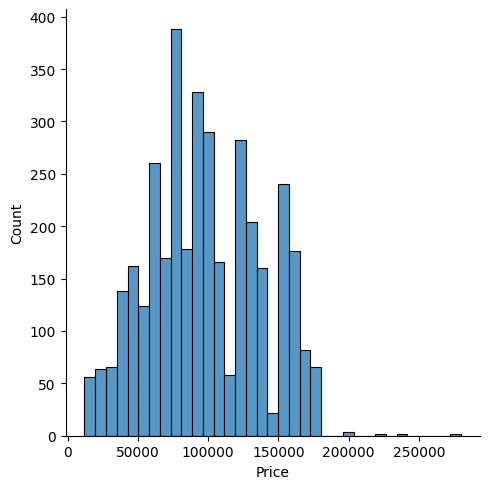

In [12]:
#Lets first check the distribution of the Price column
sns.displot(merged_df['Price'])

<Axes: xlabel='Bedrooms', ylabel='Price'>

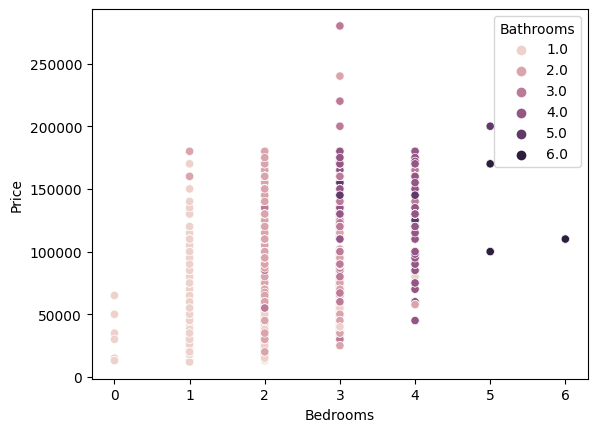

In [13]:
#scatterplot for price  and Bedrooms colored by Bathrooms
sns.scatterplot(x='Bedrooms',y='Price',data=merged_df,hue='Bathrooms')

In [14]:
#we can see that the price column is right skewed
#lets check the houses that are outliers (200000 and above))
merged_df[merged_df['Price']>=200000]

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
640,Dagoretti,240.0,5.0,5.0,200000.0
1131,Dagoretti,240.0,5.0,5.0,200000.0
2062,Langata,3.0,3.0,2.0,240000.0
2058,Langata,3.0,3.0,2.0,240000.0
2768,Westlands,3.0,3.0,3.0,280000.0
2973,Westlands,3.0,3.0,3.0,220000.0
2993,Westlands,3.0,3.0,3.0,200000.0
3054,Westlands,3.0,3.0,3.0,200000.0
3205,Westlands,3.0,3.0,3.0,280000.0
3285,Westlands,3.0,3.0,3.0,220000.0


## Conclusion
The houses with more Bedrooms and Bathrooms are more expensive


In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3690 entries, 0 to 3689
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Town       3690 non-null   object 
 1   sq_mtrs    3690 non-null   float64
 2   Bedrooms   3690 non-null   float64
 3   Bathrooms  3690 non-null   float64
 4   Price      3690 non-null   float64
dtypes: float64(4), object(1)
memory usage: 173.0+ KB


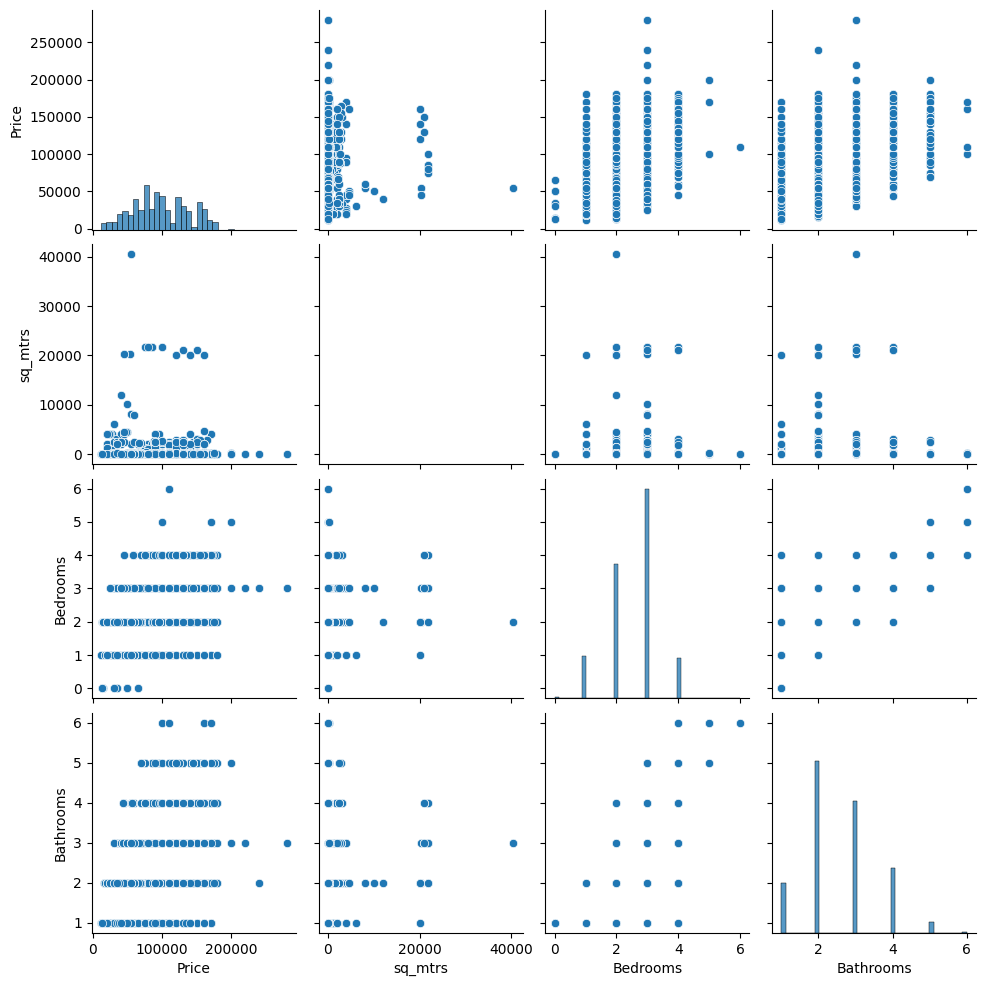

In [16]:
#generate a pairplot on price, Bedrooms, Bathrooms and sq_mtrs
sns.pairplot(merged_df[['Price','sq_mtrs','Bedrooms','Bathrooms','Town']])

In [17]:
#check for the towns
merged_df['Town'].nunique()

29

<Axes: xlabel='sq_mtrs', ylabel='Price'>

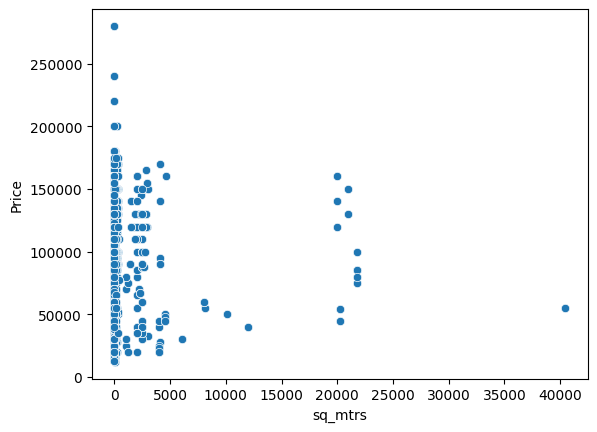

In [18]:
#The houses with more Bedrooms and bathrooms are more expensive
#Lets check the scatterplot of the sq_mtrs column with price
sns.scatterplot(x='sq_mtrs',y='Price',data=merged_df)

<Axes: xlabel='Town'>

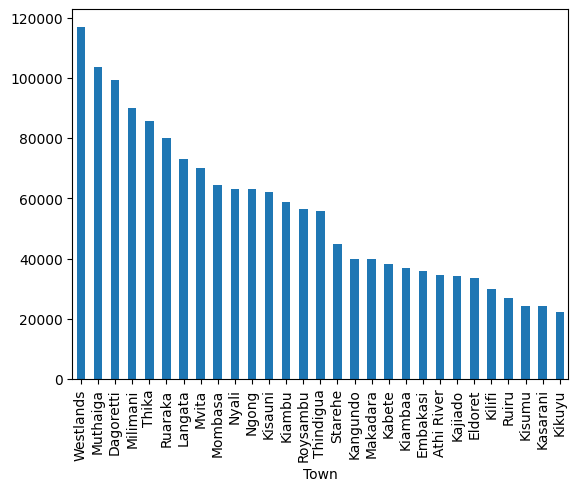

In [19]:
#grouby the towns and get the mean price,plot it
merged_df.groupby('Town')['Price'].mean().sort_values(ascending=False).plot(kind='bar')

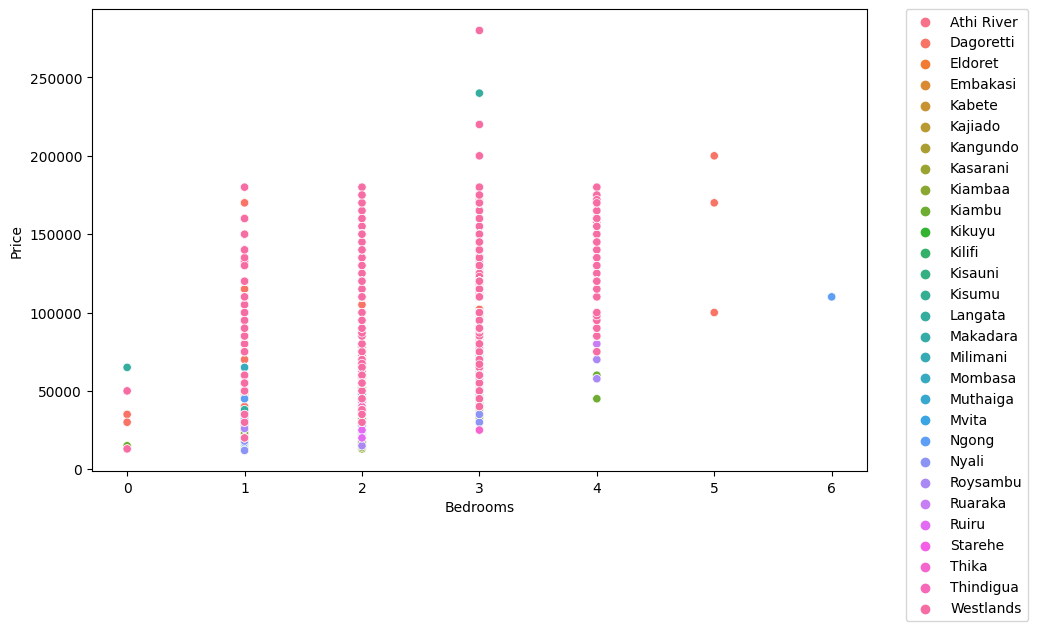

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bedrooms',y='Price',data=merged_df,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

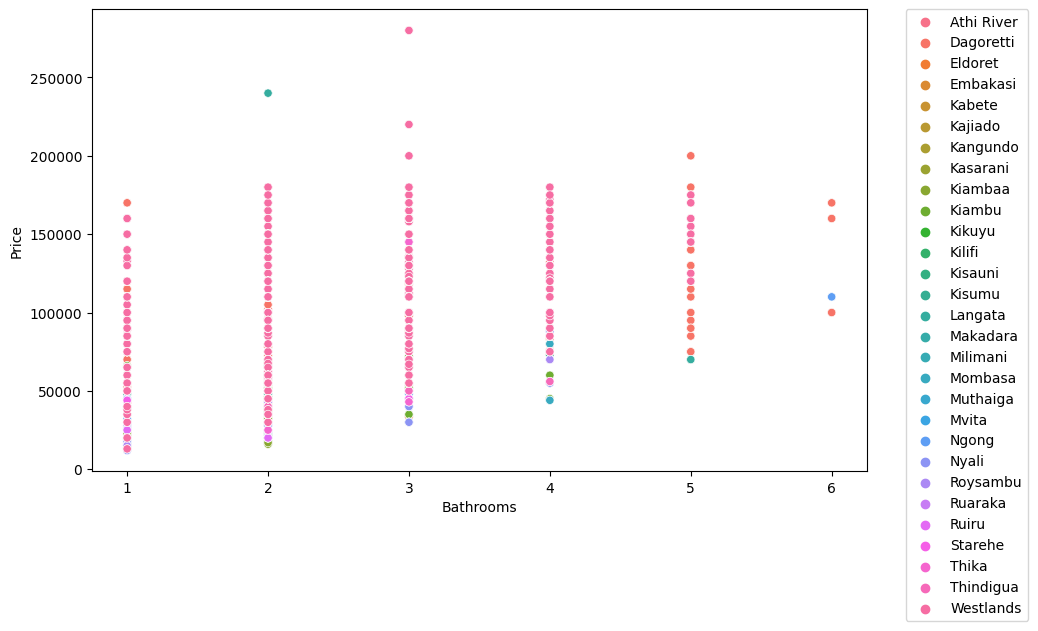

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bathrooms',y='Price',data=merged_df,hue='Town')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [22]:
#Lets check the houses with the most bedrooms
merged_df[merged_df['Bedrooms']==merged_df['Bedrooms'].max()]

,Town,sq_mtrs,Bedrooms,Bathrooms,Price
2192,Ngong,6.0,6.0,6.0,110000.0
2200,Ngong,6.0,6.0,6.0,110000.0


# Set features and labels

In [23]:
X = merged_df[["Bedrooms","sq_mtrs", "Bathrooms","Town"]]
y = merged_df[["Price"]]

# Define the model and train it

In [24]:
# Extract the numerical features and categorical feature
X_num = merged_df[["sq_mtrs","Bedrooms", "Bathrooms"]]
X_cat = merged_df[["Town"]]

In [25]:
# Create an instance of the OneHotEncoder class and fit it to the categorical feature
ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder()

In [26]:
# Transform the categorical feature using the fitted OneHotEncoder
X_cat_encoded = ohe.transform(X_cat).toarray()

In [27]:
# Combine the numerical and encoded categorical features
X = np.concatenate((X_num, X_cat_encoded), axis=1)
y = merged_df[["Price"]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Train the regression model using the training data
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

# Prediction and accuracy

In [28]:
#Predictions using the testing set 
y_pred = clf.predict(X_test)

# #Example of few predictions
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# five_pred= clf.predict(X_test)[:5]

# five_pred

In [29]:
print(X_test.shape)
print(y_test.shape)
print(y_pred.shape)

(738, 32)
(738, 1)
(738,)


In [30]:
# print("Making predictions for the following 5 houses:")
# print(X.head())
# print("The predictions are")
# str(y_test[:5])

In [31]:
# #Checking the accuracy of the model using MSE,MAE and R-squared error

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean squared error: ', mean_squared_error(y_test, y_pred))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred))
print('R-squared score: ', r2_score(y_test, y_pred))
print('Mean: ', np.mean(y_test))

Mean squared error:  764803084.1408393
Root Mean Squared error:  27655.07338881673
Mean absolute error:  19372.33066531013
R-squared score:  0.5160259774477154
Mean:  97623.9837398374


In [32]:
# trying new model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=1000, tol=1e-3, loss="squared_error"))


In [33]:
#Checking the accuracy of a model
clf.fit(X_train, y_train)
forestPred = clf.predict(X_test)
forestScores = clf.score(X_test, y_test)
forestScores

e:\Documents\Subjects\Year 3\SUMMATIVES\AI\HousingModelKenya\SUMMATIVE_AI_Group17_KenyaHousing\venv\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-128.58082348712435

In [34]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

27655.07338881673

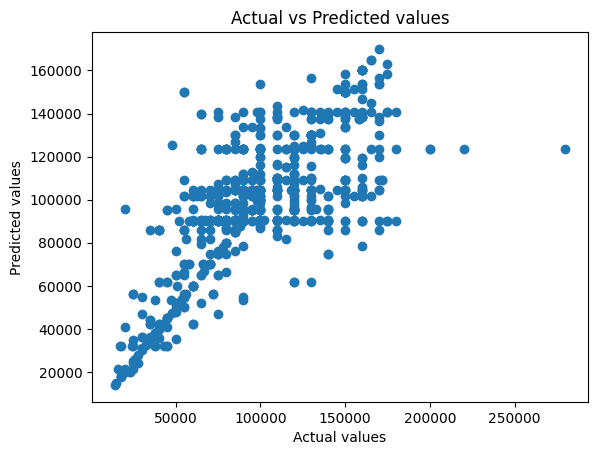

In [35]:
#using a scatter plot to visualize how well the model is perfoming
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()


In [36]:
# from sklearn.model_selection import cross_val_score
#  #Cross-validate the model
#  #Perform cross-validation on the model
# scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
# rmse_scores = np.sqrt(-scores)

#  # Display the cross-validation scores
# print('Cross-Validation Scores:', rmse_scores)
# print('Mean:', rmse_scores.mean())
# print('Standard deviation:', rmse_scores.std())


In [37]:
joblib.dump(clf, '../the_model.joblib')

['../the_model.joblib']